In [154]:
from matplotlib import style
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import scipy.stats
import scipy.optimize
style.use('ggplot')

In [155]:
def setText(plot, title, xlab, ylab):
  plot.title(title);plot.xlabel(xlab);plot.ylabel(ylab)

def setTextSub(plot, title, xlab, ylab):
  plot.set_title(title);plot.set_xlabel(xlab);plot.set_ylabel(ylab)

In [194]:
# copied from the manuel and use mutli-curser to edit
labels = [["C3_C","MEOH_2","DPPH_1","DPPH_3","C3_B",
          "C5_B","C3_C","C4_B","C3_A","T2","C2_A","C1_BK"],
          ["DPPH_2","C1_B","MEOH_3","C2_A"  ,"C4_BK","T1",
             "C3_BK","C4_BK","C1_A","C2_BK","C6_C","C4_A"],
          ["C6_BK","C6_A","C5_C","C2_BK","C3_BK","T4",
             "T4","C2_C","C5_A","C3_B","C1_C","C1_B"],
          ["C3_A","C6_B","C1_BK","C4_A","T2","C2_C",
             "C6_A","T5","T1","MEOH_2","DPPH_2","T3"],
          ["MEOH_1","T6","C2_B","C4_B","C4_C","C5_BK",
             "C4_C","C5_C","DPPH_1","DPPH_3","MEOH_3","C6_B"],
          ["T3","C1_A","C5_A","C1_C","T5","C6_C","C5_B",
             "C2_B","C6_BK","T6","C5_BK","MEOH_1"]
          ] # removed space
# Since we are group 1
labels = [i[6:] for i in labels] #kunyunaynasunhl wnagforgto starts with 0
labels = np.array(labels).flatten()

# [i.split("") for i in labels]

In [195]:
# Trolox Std  T1-T6
dataPoints = ["T"+ str(i) for i in range(1,7)]
D10 = np.array(pd.read_csv("10.csv")[[str(i) for i in range(7,12)]]).flatten()
D15 = np.array(pd.read_csv("15.csv")[[str(i) for i in range(7,12)]]).flatten()
D20 = np.array(pd.read_csv("20.csv")[[str(i) for i in range(7,12)]]).flatten()
concentrations =  [50, 12.5, 3.1, 0.78, 0.20, 0.05]

In [196]:
[frame[np.where(labels==i)] for i in dataPoints]

[array([0.082]),
 array([0.177]),
 array([0.358]),
 array([0.067]),
 array([0.355]),
 array([0.056])]

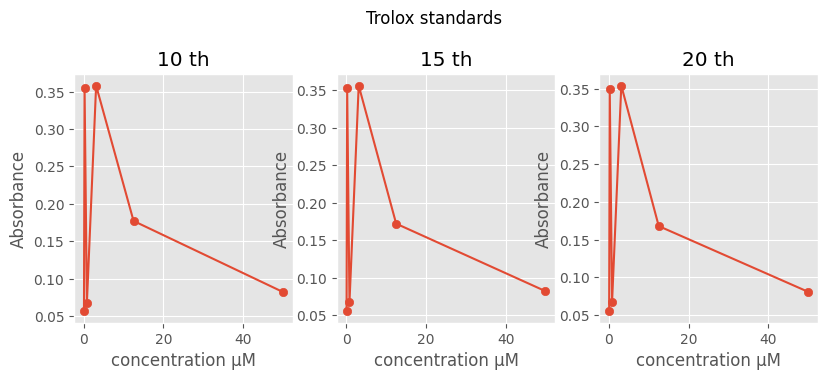

In [197]:
fig, axs = plot.subplots(1, 3, figsize=(8*1.2,3*1.2))
plot.suptitle("Trolox standards\n");fig.subplots_adjust(top=0.8)
for id, frame in enumerate([D10, D15, D20]):
    data = [frame[np.where(labels==i)] for i in dataPoints]
    axs[id].plot(concentrations, data)
    setTextSub(axs[id],f"{[10,15,20][id]} th","concentration µM","Absorbance")#kunnotmin
    axs[id].scatter(concentrations, data)

There is a outlier

x*-0.0035337159942638616+0.25485496217961756
r^2=0.2749860151205422  p-value=0.36433066028656663
x*-0.0035052069938605194+0.2526753363302467
r^2=0.27349311596552933  p-value=0.36587677839847255
x*-0.0034830285826213136+0.2501800086061854
r^2=0.2743079029560725  p-value=0.3650322271666464


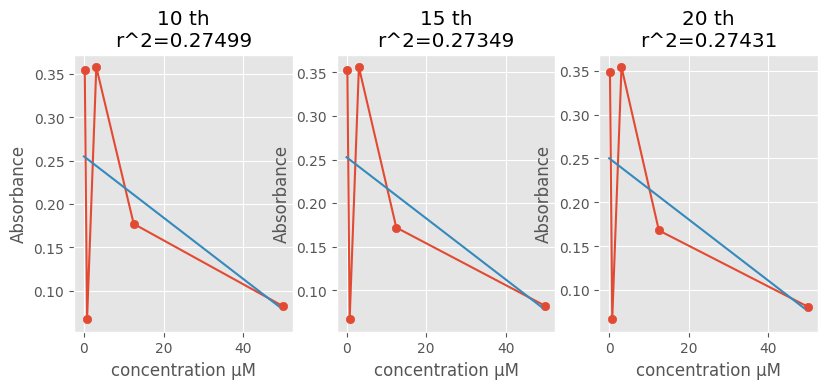

In [198]:
fig, axs = plot.subplots(1, 3, figsize=(8*1.2,3*1.2))
for id, frame in enumerate([D10, D15, D20]):
    data = [frame[np.where(labels==i)] for i in dataPoints]
    axs[id].plot(concentrations[:-1], data[:-1])
    axs[id].scatter(concentrations[:-1], data[:-1])
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(concentrations[:-1], np.array(data[:-1]).flatten())
    axs[id].plot(np.arange(0,50),np.arange(0,50)*slope+intercept)
    setTextSub(axs[id],f"{[10,15,20][id]} th\nr^2={r_value**2:.{5}f}","concentration µM","Absorbance")
    print(f"x*{slope}+{intercept}\nr^2={r_value**2}  p-value={p_value}")

### DFs2

In [199]:
samples = []
for i in range(1,7): # Sample number
    row = []
    for j in ['A','B','C']: # Replicate
        row.append(D10[np.where(labels==f"C{i}_{j}")])
    samples.append(row)

In [200]:
samples

[[array([0.102]), array([0.125]), array([0.298])],
 [array([0.133]), array([0.06]), array([0.099])],
 [array([0.101]), array([0.061]), array([0.093])],
 [array([0.123]), array([0.081]), array([0.041])],
 [array([0.198]), array([0.051]), array([0.069])],
 [array([0.049]), array([0.061]), array([0.356])]]

In [201]:
sample_blanks = []
for i in range(1,7): # Sample number
    sample_blanks.append(D10[np.where(labels==f"C{i}_BK")])

In [202]:
sample_blanks

[array([0.089]),
 array([0.07]),
 array([0.063]),
 array([0.175]),
 array([0.049]),
 array([0.049])]

In [203]:
MeOH_B = []
DPPH_B = []
for i in range(1,4):
    MeOH_B.append(D10[np.where(labels==f"MEOH_{i}")])
    DPPH_B.append(D10[np.where(labels==f"DPPH_{i}")])
    

In [204]:
MeOH_B,DPPH_B

([array([0.047]), array([0.068]), array([0.374])],
 [array([0.115]), array([0.347]), array([0.059])])

### DF 3

In [205]:
sampleMeans = np.mean(samples, axis=1)
real = sampleMeans - sample_blanks;real

array([[ 0.086     ],
       [ 0.02733333],
       [ 0.022     ],
       [-0.09333333],
       [ 0.057     ],
       [ 0.10633333]])

In [206]:
correctDPPH = np.array(DPPH_B) - MeOH_B;correctDPPH

array([[ 0.068],
       [ 0.279],
       [-0.315]])

In [207]:
rem = real/np.mean(correctDPPH)

In [208]:
rem

array([[ 8.0625 ],
       [ 2.5625 ],
       [ 2.0625 ],
       [-8.75   ],
       [ 5.34375],
       [ 9.96875]])

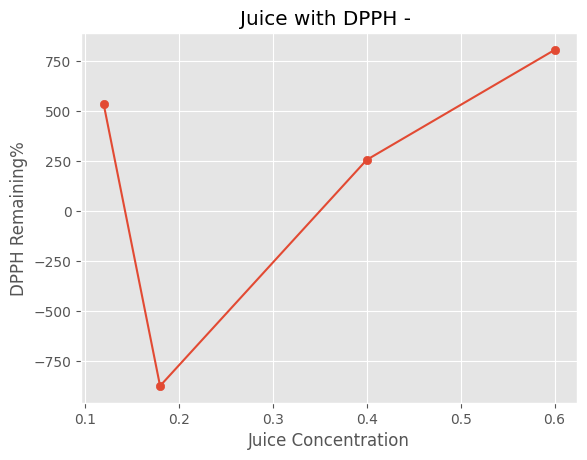

In [209]:
rem = real/np.mean(correctDPPH)
juice_concentrations = [0.6, 0.4, 0.27, 0.18, 0.12, 0.079]
juice_concentrations = np.delete(juice_concentrations, 2)
rem = np.delete(rem, 2)
juice_concentrations = np.delete(juice_concentrations, 4)
rem = np.delete(rem, 4)
plot.plot(juice_concentrations, rem*100)
plot.scatter(juice_concentrations, rem*100)
setText(plot, "Juice with DPPH - ", "Juice Concentration", "DPPH Remaining%")

### Best Fit Function

In [ ]:
# https://medium.com/@erika.dauria/looking-at-r-squared-721252709098
def R2(f, x, y):
    SSRES = np.sum(np.square(y-f(x)))
    print(SSRES)
    SSTOT = np.sum(np.square(y-np.mean(y)))
    return 1-SSRES/SSTOT

0.1978980093049397
R^2:0.9826502011875791


/tmp/ipykernel_73110/1202320079.py:3: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x)+c #sicoengxiangshi? kunyuneixnyachijianguo forgotreturn


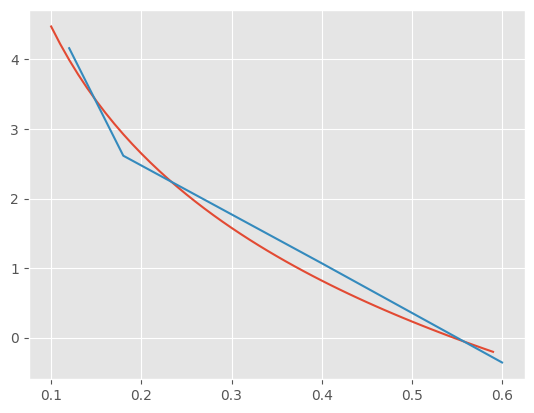

In [185]:
def f(x,a,b,c):
    # print(a,b,c,x)
    return a*np.log(b*x)+c #sicoengxiangshi? kunyuneixnyachijianguo forgotreturn
vs = scipy.optimize.curve_fit(f, juice_concentrations, rem*100)
X = np.arange(0.1,0.6,0.01)
plot.plot(X, f(X, vs[0][0], vs[0][1], vs[0][2]))
plot.plot(juice_concentrations, rem*100)
print(f"R^2:{R2(lambda x: f(x, vs[0][0], vs[0][1], vs[0][2]), juice_concentrations, rem*100)}")

In [186]:
print(vs[0][0], vs[0][1], vs[0][2])

-2.635285025797072 1.7272428671008013 -0.1538096837812222


0.7706967272169115
R^2:0.9324327050607125


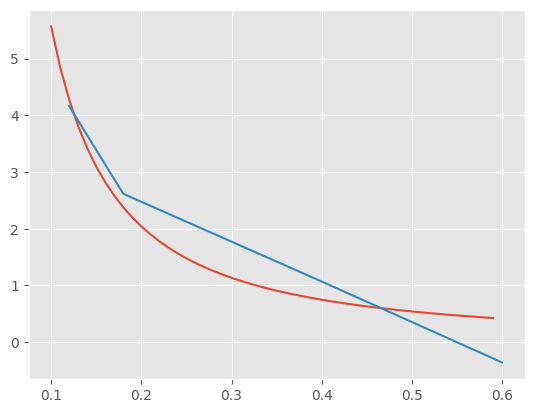

In [181]:
def f(x,a,b):
    # print(a,b,c,x)
    return a/(x**b) #sicoengxiangshi? kunyuneixnyachijianguo forgotreturn
vs = scipy.optimize.curve_fit(f, juice_concentrations, rem*100)
X = np.arange(0.1,0.6,0.01)
plot.plot(X, f(X, vs[0][0], vs[0][1]))
plot.plot(juice_concentrations, rem*100)
print(f"R^2:{R2(lambda x: f(x, vs[0][0], vs[0][1]), juice_concentrations, rem*100)}")


0.5730710217328714
R^2:0.9497586308866136


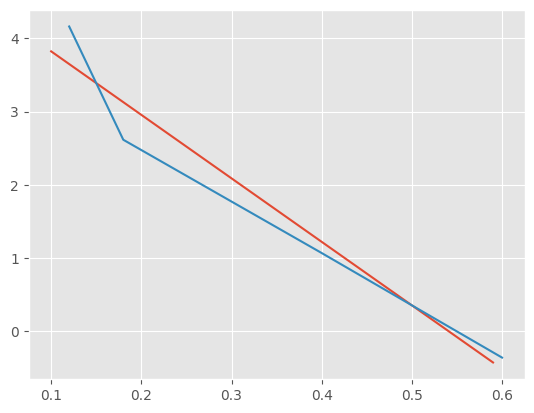

In [182]:
def f(x,a,b):
    # print(a,b,c,x)
    return a*x+b #sicoengxiangshi? kunyuneixnyachijianguo forgotreturn
vs = scipy.optimize.curve_fit(f, juice_concentrations, rem*100)
X = np.arange(0.1,0.6,0.01)
plot.plot(X, f(X, vs[0][0], vs[0][1]))
plot.plot(juice_concentrations, rem*100)
print(f"R^2:{R2(lambda x: f(x, vs[0][0], vs[0][1]), juice_concentrations, rem*100)}")

1


0.9497586308866136

In [152]:
# a = lambda x: f(X, vs[0][0], vs[0][1])
# a([1,2])
# vs[0][1]

4.688755342340369